# SQL Query Classification: Detecting Malicious Queries

In this notebook, we’ll dig into a dataset of SQL queries and predict if they’re potentially harmful or safe. Each query is labeled as 'malicious' (1) or 'benign' (0), which is crucial in spotting SQL injection attacks—a top threat to web security.

The steps we will follow are:

1. **Data Exploration**: Analyze the dataset to understand its structure and distribution.
2. **Text Preprocessing**: Transform the SQL queries into numerical features.
3. **Model Building**: Train a Logistic Regression model as a baseline classifier.
4. **Evaluation**: Assess the model's performance with appropriate metrics.
5. **Visualization**: Enhance the analysis with visual insights.
6. **Conclusion**: Summarize findings and potential future work.

## 1. Data Exploration

First, we’ll load the dataset and take a look at its basic features: any missing values, label distribution, and the structure of the SQL queries.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [7]:
# Load the dataset
file_path = '/Users/sergioperez/Desktop/clean_sql_dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values and data structure
missing_values = data.isnull().sum()
label_distribution = data['Label'].value_counts()

# Analyze the length of queries
data['Query_length'] = data['Query'].apply(len)
query_length_stats = data['Query_length'].describe()

# Display findings
missing_values, label_distribution, query_length_stats


(Query    0
 Label    0
 dtype: int64,
 Label
 1    77750
 0    70576
 Name: count, dtype: int64,
 count    148326.000000
 mean        364.494762
 std         295.385665
 min           1.000000
 25%          85.000000
 50%         302.000000
 75%         609.000000
 max        5370.000000
 Name: Query_length, dtype: float64)

### Key Findings:
- No missing values are found.
- The dataset has a balanced distribution of benign (0) and malicious (1) queries.
- SQL queries range widely in length, which could point to different patterns, possibly linked to varied SQL injection tactics.


## 2. Text Preprocessing and Feature Extraction

To make the SQL queries machine-readable, we’ll use **TF-IDF (Term Frequency-Inverse Document Frequency)**. This technique turns text into numerical features, highlighting unique terms. We’ll cap the vocabulary at 5,000 terms to keep things manageable.


In [8]:
# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Query'])

# Split the data into training and test sets
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Model Building and Evaluation
We will use **Logistic Regression** as a baseline model. This is a simple yet powerful algorithm for binary classification tasks like this one. After training the model, we'll evaluate its performance on the test set using metrics such as precision, recall, F1-score, and accuracy.


In [10]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14147
           1       0.99      0.93      0.96     15519

    accuracy                           0.96     29666
   macro avg       0.96      0.96      0.96     29666
weighted avg       0.96      0.96      0.96     29666



### Model Performance:

The Logistic Regression model achieves a 96% accuracy! Precision and recall are high, so the model is doing a great job at telling apart benign and malicious queries.
 
- **Precision**: Of the queries predicted as malicious, this is how many were truly malicious.
- **Recall**: This tells us how many actual malicious queries were correctly flagged.
- **F1-Score**: Balances precision and recall for a clearer picture of overall performance.



## 4. Visualization

Let’s use some graphs to make sense of the label distribution, query lengths, and model performance.



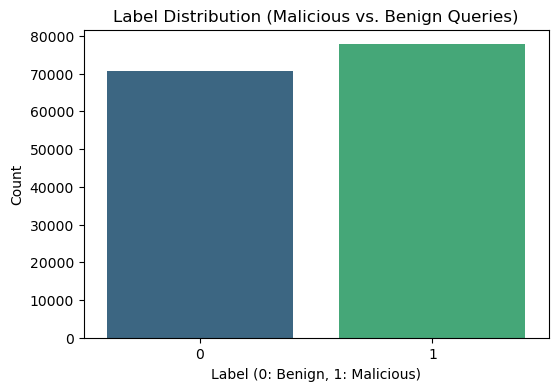

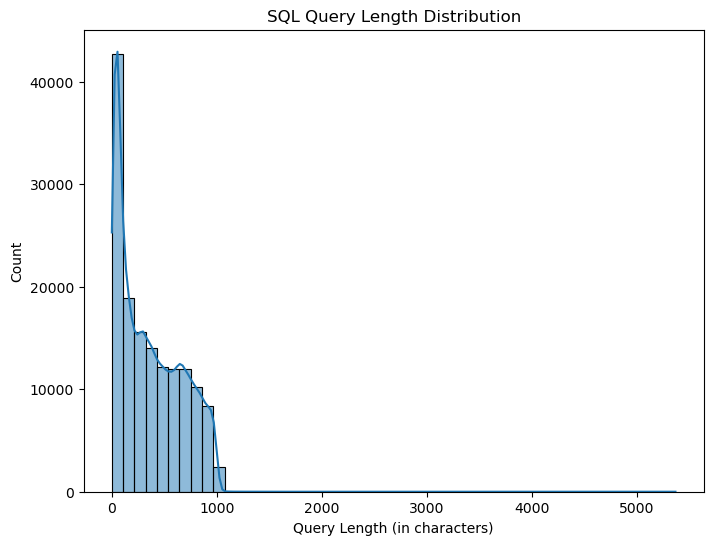

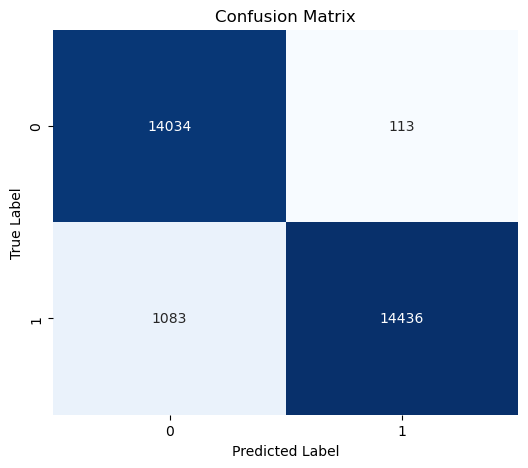

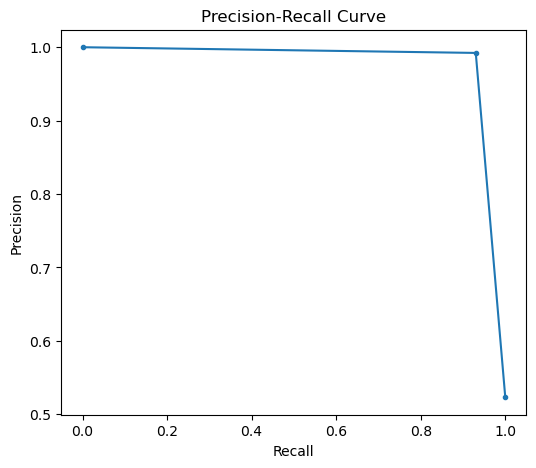

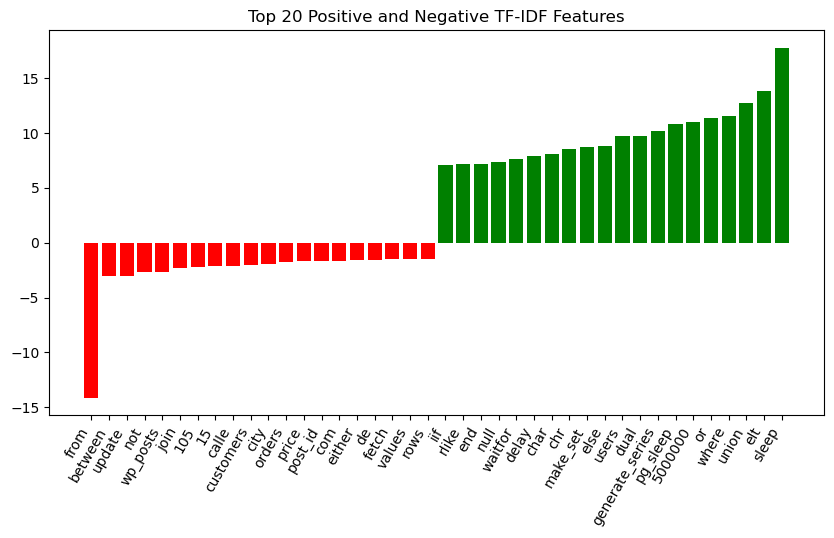

In [11]:
# 1. Visualization for Label Distribution
def plot_label_distribution():
    label_counts = data['Label'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
    plt.title('Label Distribution (Malicious vs. Benign Queries)')
    plt.xlabel('Label (0: Benign, 1: Malicious)')
    plt.ylabel('Count')
    plt.show()

# 2. Visualization for Query Length Distribution
def plot_query_length_distribution():
    plt.figure(figsize=(8,6))
    sns.histplot(data['Query_length'], bins=50, kde=True)
    plt.title('SQL Query Length Distribution')
    plt.xlabel('Query Length (in characters)')
    plt.ylabel('Count')
    plt.show()

# 3. Confusion Matrix Visualization
def plot_confusion_matrix():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 4. Precision-Recall Curve
def plot_precision_recall_curve():
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# 5. Feature Importance (Top TF-IDF Features)
def plot_top_tfidf_features():
    feature_names = vectorizer.get_feature_names_out()
    coef = model.coef_[0]
    top_positive_coefficients = np.argsort(coef)[-20:]
    top_negative_coefficients = np.argsort(coef)[:20]
    
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    plt.figure(figsize=(10,5))
    colors = ['red' if c < 0 else 'green' for c in coef[top_coefficients]]
    plt.bar(np.arange(40), coef[top_coefficients], color=colors)
    plt.xticks(np.arange(40), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title('Top 20 Positive and Negative TF-IDF Features')
    plt.show()

# Execute the plots
plot_label_distribution()
plot_query_length_distribution()
plot_confusion_matrix()
plot_precision_recall_curve()
plot_top_tfidf_features()


## 5. Conclusion
Our Logistic Regression model achieved a solid 96% accuracy in classifying SQL queries as either malicious or benign.
 
### Future Work:
- Try out advanced models like Support Vector Machines or neural networks for even better results.
- Fine-tune hyperparameters to boost Logistic Regression performance.
- Explore ways to handle any noisy or irrelevant queries in the dataset.
 
This workflow highlights how machine learning can help tackle SQL injection threats.
